<a href="https://colab.research.google.com/github/secutron/RunTime/blob/master/G1_Seprable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# baseline: "First Order Motion Model for Image Animation"
- separable type @ 20.07월

**Clone repository**

In [1]:
!nvidia-smi

Tue Aug 11 08:25:51 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!pwd

/content


In [4]:
#!git clone https://github.com/AliaksandrSiarohin/first-order-model '/content/drive/My Drive/GTask/FOMM'

In [5]:
%cd '/content/drive/My Drive/GTask/FOMM'

/content/drive/My Drive/GTask/FOMM


In [6]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage.transform import resize
from IPython.display import HTML
import warnings
warnings.filterwarnings("ignore")

In [7]:
import cv2
import os

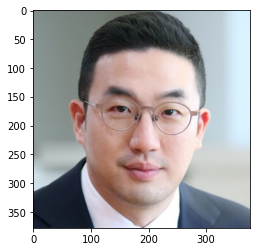

In [8]:
source_image = imageio.imread('/content/drive/My Drive/koo20/koo-sq.jpg')
# push 후 우측버튼 --> 구글 드라이브로 저장(크롬확장)

plt.imshow(source_image)


In [9]:
#driving_video = imageio.mimread('/content/drive/My Drive/GTask/01TTS-texture/LGE-splits/LSS_01.mp4', memtest=False)
#driving_video = imageio.mimread('/content/drive/My Drive/GTask/01TTS-texture/LGE-splits/LSS_01.mp4', memtest=False)
#driving_video = imageio.mimread('/content/drive/My Drive/koo20/vid1.mp4', memtest=False)

reader = imageio.get_reader('/content/drive/My Drive/GTask/01TTS-texture/LGE-splits/LSS_01.mp4')
#cap = cv2.VideoCapture('/content/drive/My Drive/koo20/vid1.mp4')


fps = reader.get_meta_data()['fps']
print(fps)

length = reader.get_length()
print(length)

length = reader.get_meta_data()['nframes']
print(length)

writer = imageio.get_writer('/content/drive/My Drive/GTask/01TTS-texture/LGE-splits/LSS_01_r.mp4', fps=fps)

for i, fr in enumerate(reader):
    #print(i)
    if(i>length -4):
        break
    writer.append_data(fr[:, :, :])
writer.close()
print("*** done")

60.0
172
172
*** done


In [11]:
#Resize image and video to 256x256


driving_video = imageio.mimread('/content/drive/My Drive/GTask/01TTS-texture/LGE-splits/LSS_01_r.mp4', memtest=False)
#driving_video = imageio.mimread('/content/drive/My Drive/koo20/vid2.mp4', memtest=False)

source_image = resize(source_image, (256, 256))[..., :3]
driving_video = [resize(frame, (256, 256))[..., :3] for frame in driving_video] 

#len(driving_video)
#break

def display(source, driving, generated=None):
    fig = plt.figure(figsize=(8 + 4 * (generated is not None), 6))

    ims = []
    for i in range(len(driving)):
        cols = [source]
        cols.append(driving[i])
        if generated is not None:
            cols.append(generated[i])
        im = plt.imshow(np.concatenate(cols, axis=1), animated=True)
        plt.axis('off')
        ims.append([im])

    ani = animation.ArtistAnimation(fig, ims, interval=50, repeat_delay=1000)
    plt.close()
    return ani
    

HTML(display(source_image, driving_video).to_html5_video())

**Create a model and load checkpoints**

In [13]:
from demo import load_checkpoints
generator, kp_detector = load_checkpoints(config_path='/content/drive/My Drive/GTask/FOMM/config/vox-256.yaml', 
                            checkpoint_path='/content/drive/My Drive/koo20/vox-cpk.pth.tar')

FileNotFoundError: ignored

**Perfrorm image animation**

In [ ]:
from demo import make_animation
from skimage import img_as_ubyte

predictions = make_animation(source_image, driving_video, generator, kp_detector, relative=True, adapt_movement_scale=True)

#save resulting video
imageio.mimsave('../generated.mp4', [img_as_ubyte(frame) for frame in predictions])
#video can be downloaded from /content folder

HTML(display(source_image, driving_video, predictions).to_html5_video())